# SOUP 2024 Exercise set 1: Hypothesis testing, Goodness of Fit

Welcome to the SOUP exercise set! 

#### Prerequisite: installation instructions

To make sure you can take part in the exercises during the hands-on session on Statistics, you should ensure before coming to SoUP that you have a computer that can run python 3.6 or newer, with the modules numpy, scipy, matplotlib, and that you are able to run “jupyter notebooks”.
If you are not familiar with these tools already, we recommend this walkthrough on how to install the necessary software:
https://python-for-scientists.readthedocs.io/en/latest/_pages/install_python.html

The short version:
1) Install python with miniconda from the website: https://docs.anaconda.com/miniconda/
2) If you’re using windows, use the Anaconda Prompt application, otherwise open your command line.
3) Install the required packages by typing and running (press enter) "conda install numpy scipy matplotlib notebook”
4) open a “jupyter notebook” by typing and running “jupyter notebook” and following the instructions to open a localhost “website".
5) You should now be able to open the SOUP24_exercise1.ipynb document

In case of problems, contact Knut Dundas Morå at fysikk at dundasmora dot no 

In [1]:
# Import modules with the tools we need: 
import scipy.stats as sps
import matplotlib.pyplot as plt
import numpy as np

## 0: Getting Started

The aim of this section is to make sure that you will have the tools you need for the rest
of the course- make sure to play around with the examples you see below before moving on.

#### Numpy vectors

Numpys array format is the first step towards eﬃcient computation with python.
Here are some examples of useful functions: 

In [2]:
a = np.array([2,3,4])
print("a:",a)
b = np.linspace(0,1.,3)
print("b:", b)
c = np.zeros(3)
print("c:",c)
d = a+b
print("d:",d)
print("d^2:",d**2)

a: [2 3 4]
b: [0.  0.5 1. ]
c: [0. 0. 0.]
d: [2.  3.5 5. ]
d^2: [ 4.   12.25 25.  ]



#### Use vectors whenever possible
Modern computers are very efficient at performing parallel operations, and much of numpy/scipy allows you to perform operations on an entire vector at once. As an example, these cells both generate N random numbers, but on my computer the loop is 6000 times slower!

In [3]:
N = 10000

In [4]:
%%timeit 
ret = sps.norm().rvs(N)

341 µs ± 1.41 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [5]:
%%timeit
ret = np.zeros(N)
for i in range(N):
    ret[i] = sps.norm().rvs()

2.18 s ± 14.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


#### Built-in distributions: 
Pseudorandom numbers generated according to some statistical distribution are crucial in
many computations. Using scipy.stats, you find a large number of ready-made functions:
http://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html. The exam-
ple below shows how you may generate some random numbers from a gaussian distribution by
creating an object r with a normal distribution:

In [6]:
mu=10
sigma = 5
r = sps.norm(mu,sigma)
print("the mean of r is: ", r.mean())
print("the variance of r is: ", r.var()) #variance
print("a random number from r:",r.rvs()) #one random number
print("ten random numbers from r:", r.rvs(10)) #array with 10 random numbers

the mean of r is:  10.0
the variance of r is:  25.0
a random number from r: 19.357539120916382
ten random numbers from r: [12.43876781  7.99066015 10.72313208 15.38171211 -3.85307665  8.58004692
 19.27085523 19.77407107  4.39061808  8.10217653]


#### Plotting
Matplotlib contains a plethora of plotting functions. If you are looking for the correct
function, enter http://matplotlib.org/gallery.html, and pick the one you like.

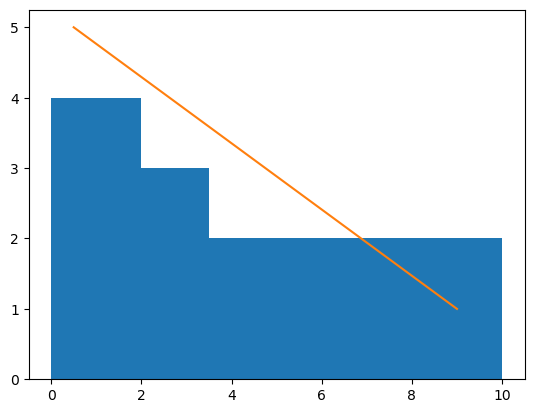

the histogram function gives you binned counts (+bin edges and the plot) as a return:  (array([4., 3., 2.]), array([ 0. ,  2. ,  3.5, 10. ]), <BarContainer object of 3 artists>)


In [7]:
data = [1,1,2,1,5,3,0.7,3,5] 
bins = [0,2,3.5,10] #edges of the bins
plt.clf()
ret = plt.hist(data, bins=bins)
plt.plot([0.5,9],[5,1])
plt.show()
print("the histogram function gives you binned counts (+bin edges and the plot) as a return: ", ret)

## 1: The Central Limit Theorem

Try out generating and plotting the distribution of the sum of N random numbers. Can you show them approaching a Gaussian? Is there anything you can do to make it not do so?

## 2: Goodness-of-fit

Now consider the problem of checking if this sum _is_ Gaussian. Generate M random sums of N random numbers, and try out some goodness-of-fit tests such as: 
- the Kolmogorov-Smirnov
- Anderson-Darling
- Chi-square
- (Bonus: if you choose the distribution of each of the N summands, can you compute an analytical distribution of the sum so that you can use the likelihood ratio?)

### Power investigation!
Try plotting the _power_ to reject the hypothesis that M sums of N random numbers each is a Gaussian distribution at some significance level alpha. 

### Already done?
If you have time-- consider if you have histogram in some measurement dimension (decide on a nice background distribution yourself)  with some unknown background that occurs in half of the bins. 
Can you compare the power of discovering this mismodelling if you know and if you do not know which bins are affected by this mismodelling?